<a href="https://colab.research.google.com/github/Shakilkhan24/Playground_DL/blob/main/url_to_text_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain

  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [13]:
from langchain_community.document_loaders import WebBaseLoader
loader = WebBaseLoader(["https://supervision.roboflow.com/0.19.0/how_to/filter_detections/"])
docs = loader.load()


In [14]:
print(docs[0].page_content)














Filter Detections - Supervision




















          Skip to content
        

















            Supervision
          



            
              Filter Detections
            
          




































            Initializing search
          












    roboflow/supervision
  










        
  
    
  
  Home

      



          
  
  How to

        



          
  
  API

        



        
  
    
  
  Cookbooks

      



          
  
  Contribute

        



          
  
  Changelog

        














    Supervision
  






    roboflow/supervision
  






    Home
  






    How to
  





            How to
          




    Detect and Annotate
  





    Track Objects
  






    Filter Detections
  




    Filter Detections
  




      Table of contents
    




      by specific class
    





      by set of classes
    





      by confidence
    





      by area
    





     

# give the extracted text to any llm chatbot, and ask about anything from the text or extracted data ... for example (claude)

In [ ]:
!pip install ultralytics

In [ ]:
!pip install supervision

In [7]:
import cv2
import supervision as sv
from ultralytics import YOLO

model = YOLO("yolov8n.pt")


100%|██████████| 6.23M/6.23M [00:00<00:00, 77.9MB/s]



0: 384x640 1 person, 253.4ms
Speed: 17.9ms preprocess, 253.4ms inference, 25.0ms postprocess per image at shape (1, 3, 384, 640)


In [9]:
image = cv2.imread('/content/WIN_20221223_19_34_06_Pro.jpg')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)


0: 384x640 3 persons, 113.5ms
Speed: 2.5ms preprocess, 113.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


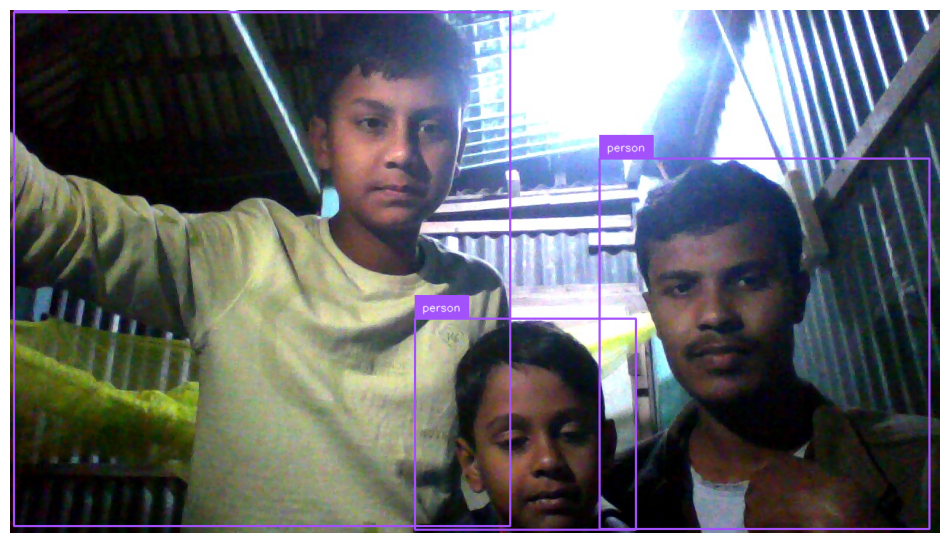

In [10]:
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    model.model.names[class_id]
    for class_id
    in detections.class_id
]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

import supervision as sv

sv.plot_image(annotated_image)